In [5]:

from IPython.display import Image

import supervision as sv
from supervision.metrics import MeanAveragePrecision

from ultralytics import YOLO


In [3]:

model = YOLO('yolov12m.pt')

results = model.train(data=f'data.yaml', epochs=100)


Ultralytics 8.3.204 🚀 Python-3.9.12 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16117MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov12m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

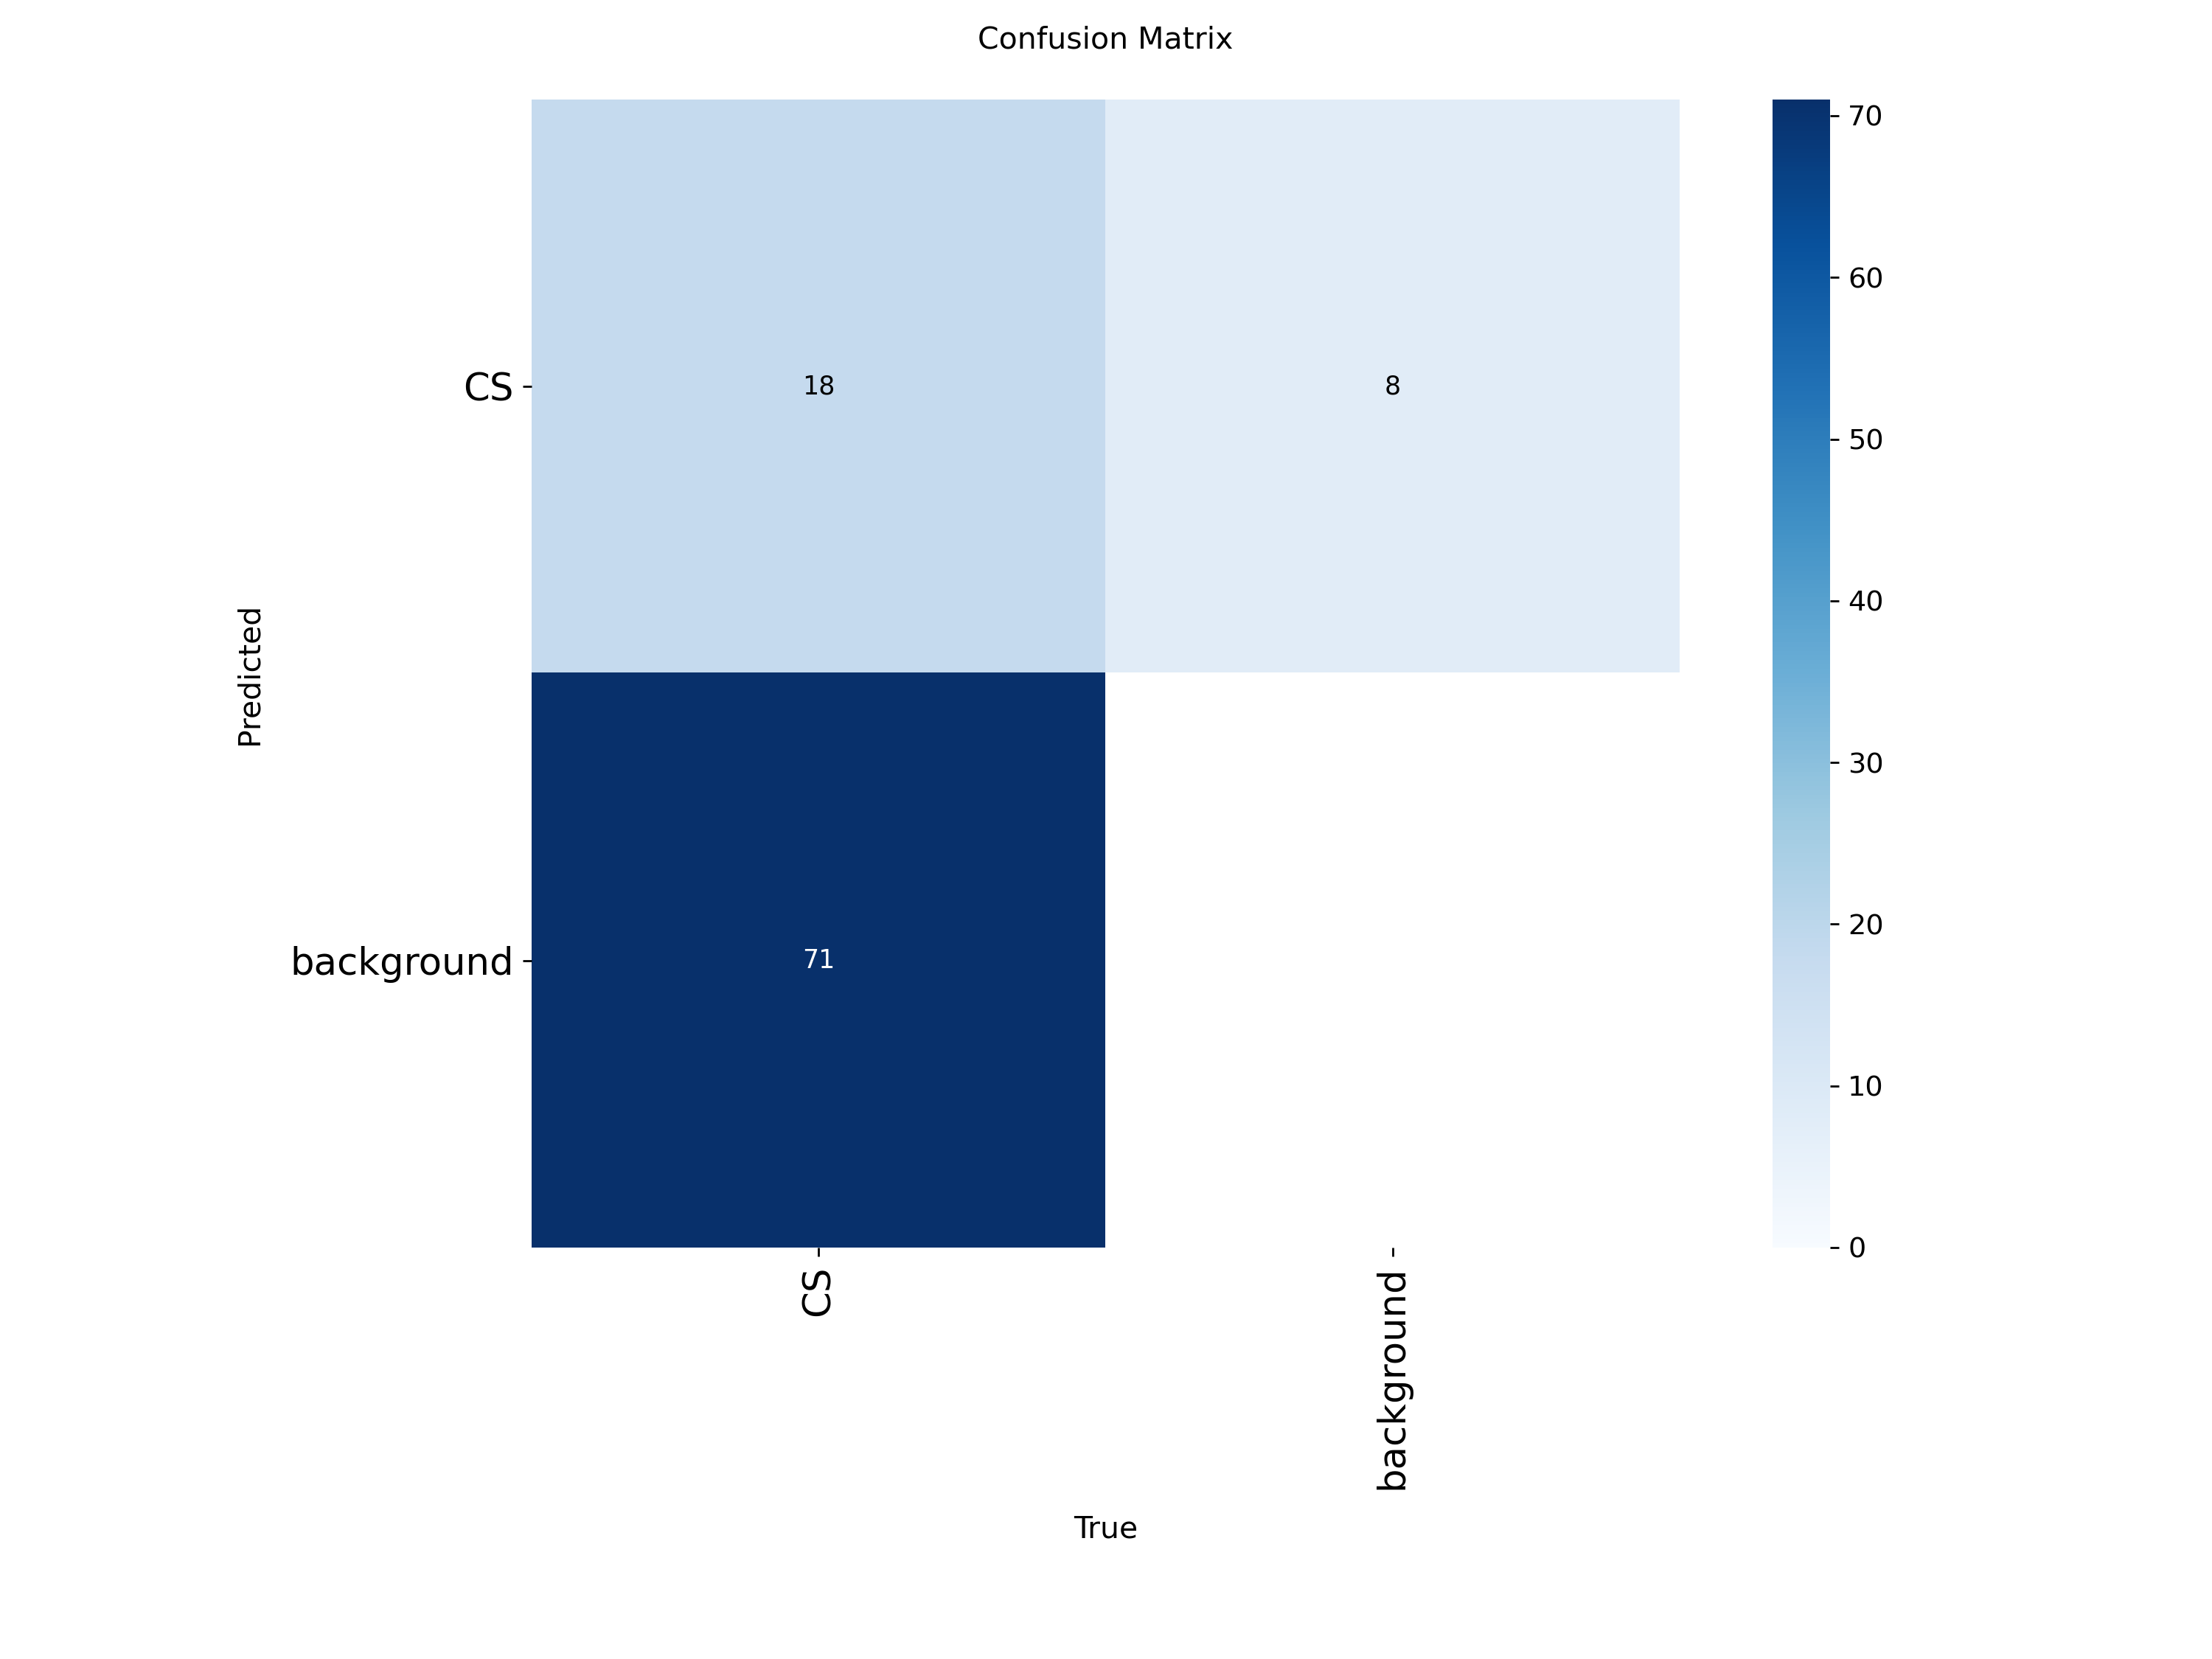

In [6]:

dirs = 'train3'

Image(filename=f'runs/detect/{dirs}/confusion_matrix.png', width=1000)

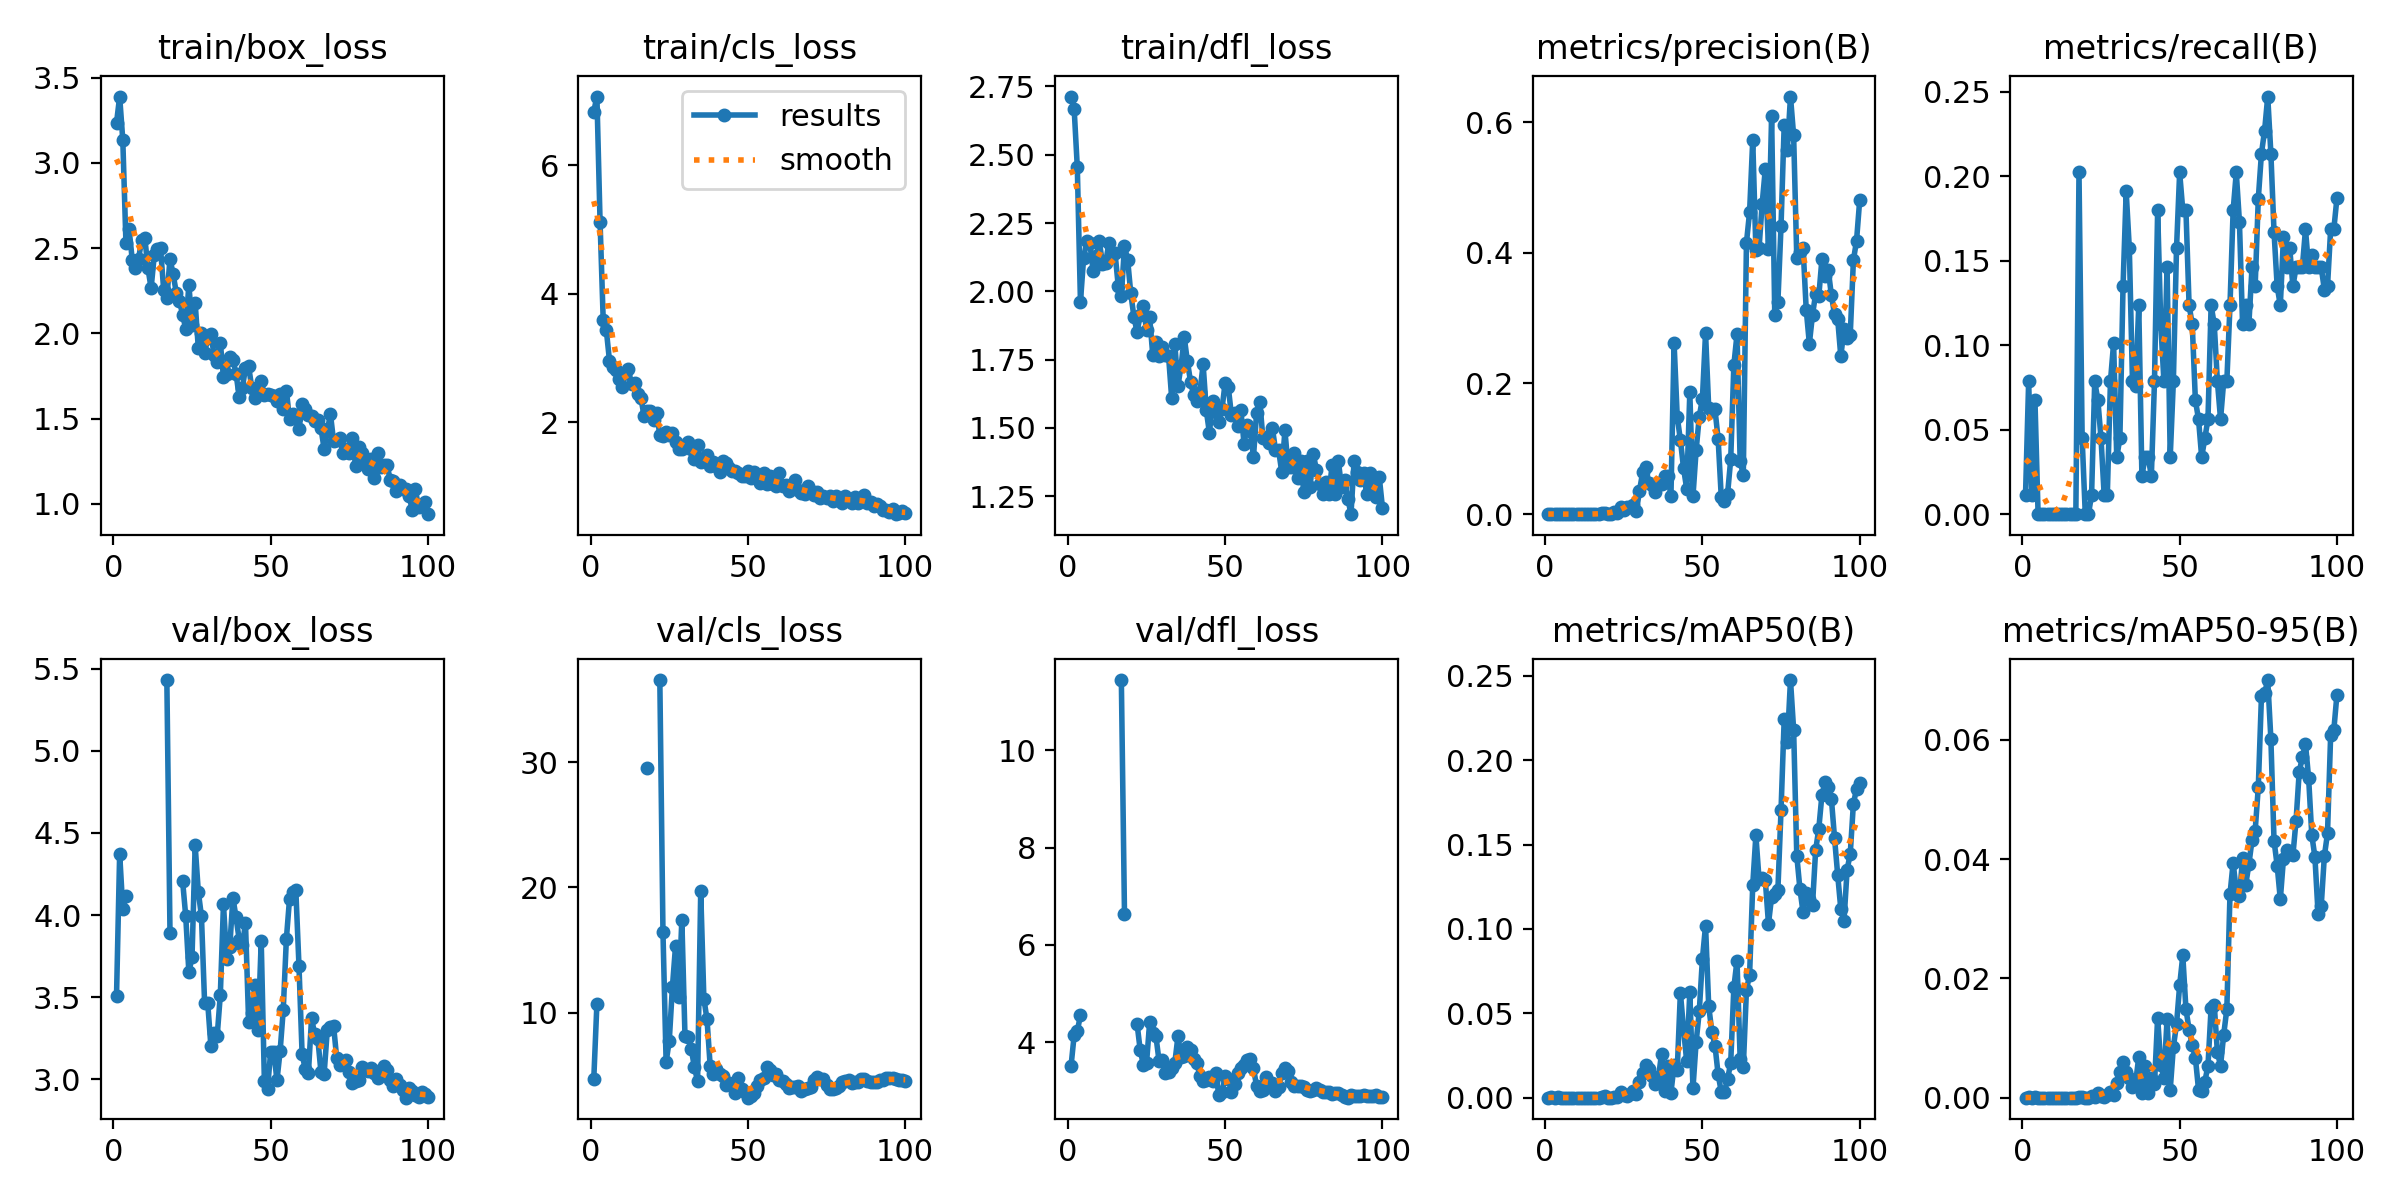

In [7]:

Image(filename=f'runs/detect/{dirs}/results.png', width=1000)


In [8]:

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"yolo_export/test/images",
    annotations_directory_path=f"yolo_export/test/labels",
    data_yaml_path=f"data.yaml"
)

ds.classes

['CS']

In [9]:

model = YOLO(f'runs/detect/{dirs}/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [10]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.052923862440502636
mAP 50 0.20301523762713958
mAP 75 0.010608203677510608


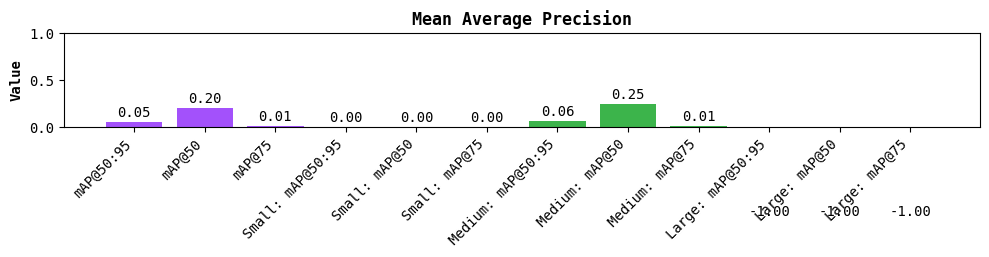

In [11]:
%matplotlib inline

map.plot()

In [12]:

model = YOLO(f'runs/detect/{dirs}/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"yolo_export/test/images",
    annotations_directory_path=f"yolo_export/test/labels",
    data_yaml_path=f"data.yaml"
)
     

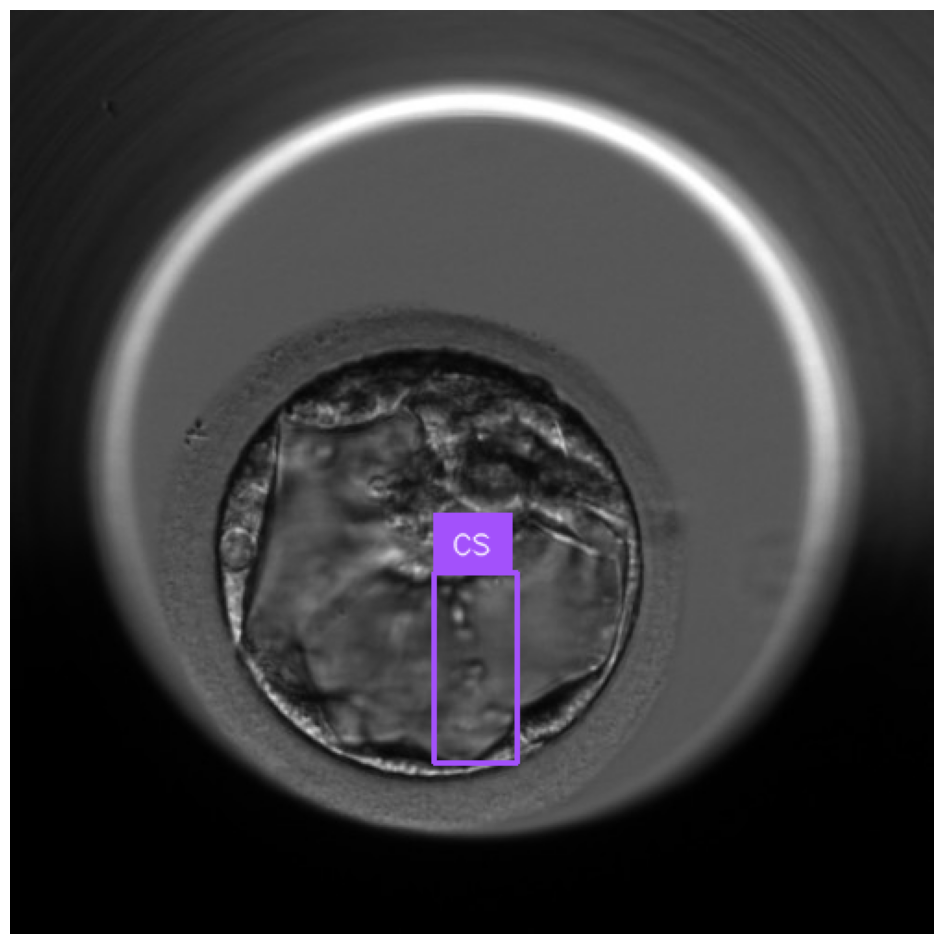

In [20]:

import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)